In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [4]:
# Đọc dữ liệu từ file CSV vào DataFrame
data = pd.read_csv('/content/drive/MyDrive/AI_Tailieu/resourcs/ID3_Tuancuoi_Baitap2.csv')
data

,Clothes,Temperature,Humidity,Wind,Class
0,more,high,prodigious,no,N
1,more,high,prodigious,great,N
2,more,high,prodigious,middling,N
3,normal,high,prodigious,no,P
4,normal,high,prodigious,middling,P
5,enough,moderate,prodigious,no,N
6,enough,moderate,prodigious,middling,N
7,enough,high,very good,no,P
8,enough,high,very good,great,N
9,more,moderate,prodigious,no,N


In [6]:
X = data.iloc[:, :-1]  # các cột đầu tiên là các feature
X

,Clothes,Temperature,Humidity,Wind
0,more,high,prodigious,no
1,more,high,prodigious,great
2,more,high,prodigious,middling
3,normal,high,prodigious,no
4,normal,high,prodigious,middling
5,enough,moderate,prodigious,no
6,enough,moderate,prodigious,middling
7,enough,high,very good,no
8,enough,high,very good,great
9,more,moderate,prodigious,no


In [7]:
y = data.iloc[:, -1]  # cột cuối là nhãn
y

0     N
1     N
2     N
3     P
4     P
5     N
6     N
7     P
8     N
9     N
10    N
11    N
12    N
13    P
14    P
15    P
16    P
17    P
18    N
19    P
Name: Class, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,Clothes,Temperature,Humidity,Wind
0,1,0,0,2
1,1,0,0,0
2,1,0,0,1
3,2,0,0,2
4,2,0,0,1
5,0,1,0,2
6,0,1,0,1
7,0,0,1,2
8,0,0,1,0
9,1,1,0,2


In [9]:
# Tạo cây quyết định với thuật toán ID3
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [14]:
# Đánh giá độ chính xác (độ hiệu quả)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # iloc[:, 1:] truy cập toàn bộ dòng và toàn bộ cột, đắt đầu từ cột 2 
dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


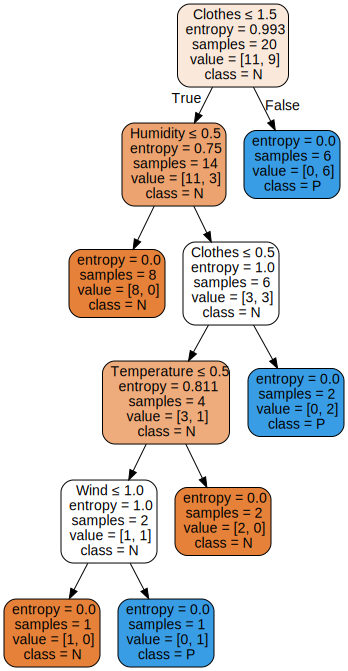

In [13]:
# Vẽ cây quyết định
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph